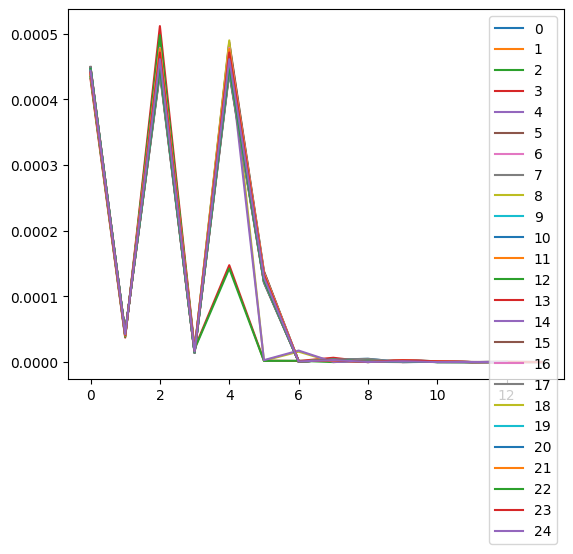

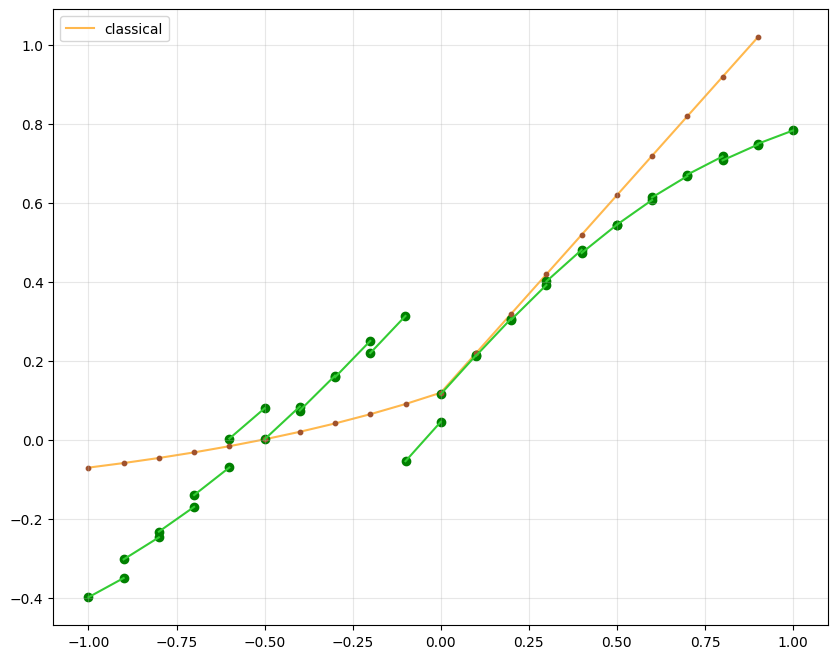

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np 
from vqls import *
from utils import *

nq = 1
n_step = 20
step = (1-(-1))/n_step

label = 'elu'
func_out = {'sigmoid': sigmoid,'tanh': tanh,'elu': elu, 'relu': relu}#, 'sin':sin_m}
func_list = list(func_out.keys())
func_dict = {'sigmoid': .0,'tanh': 1.0,'elu':.12, 'relu':.0, 'sin':.0}
columns=['function', 'nq', 'knot', 'training cost', 'time(s)', 'weights', 'RSS_h', 'RSS_q' ]

file_path = f'results_vqs_{label}_1_{n_step}.json'

lower = -1. 
upper = 1. 
f_i = func_dict[label]
scaled=False
func = func_out[label]


df = pd.read_json(file_path)

#Visualize training cost and obtain best performing epoch
argM = []
for i,item in enumerate(df["training_cost"].values):
    argM.append(np.argmin(item))
    plt.plot(item, label = i)
plt.legend()
plt.show()
best = np.argmin(df['rmse'])
weights = df['weights'][best]


X = []
weights = df['weights'][best]
x = np.arange(-1, 1 + .03, step).tolist()
from utils import *
y = [func(value,f_i) for value in x]

for i in range(1, len(x)):
    X.append(np.arange(x[i - 1], x[i], step - 0.0001).tolist())



#################################
######### Inner Product #########
#################################

qc_full = []
classic_prod = []
qprod = qProduct(1)
for i in range(len(X)):
    for x in X[i]:
        point = [1,x]
        qc_full.append(qprod.direct_prod2(weights[i],point,visualize=False))  

x = [item for sublist in X for item in sublist]
y = [func(value,f_i) for value in x]




x1=[i for j,i in enumerate(x) if j%2==0]
y1=[i for j,i in enumerate(y) if j%2==0]
x2 = np.array([i for i in x]).reshape([20,2])
yeee = np.array([i.item() for i in qc_full]).reshape([20,2])


fig, ax = plt.subplots(figsize=(10, 8))
#ax.plot(x, qc_full, color='steelblue',label=' Qspline') 
#ax.scatter(x, qc_full, color='steelblue',label=' Qspline') 
for xk, yk in zip(x2, yeee):
    ax.plot(xk, yk, color='#33cc33') 
    ax.scatter(xk, yk, color='#008000') 

ax.plot(x1,y1,color='#ffb84d', zorder = -1, label='classical')
ax.scatter(x1,y1,color='sienna',s=10)
ax.grid(alpha=0.3)
plt.legend(loc='best')
plt.show()
plt.close()


In [2]:
df.head()

,exe_time,rmse,RSS_q,weights,training_cost,seed
0,132.375429,0.161582,1.044350,"[[0.8201914595], [0.7232256692], [0.6903726932...","[0.0004481337, 4.4256000000000005e-05, 0.00044...",2202
1,131.472846,0.154265,0.951909,"[[0.8184495506], [0.7186080242], [0.6888042068...","[0.0004428052, 4.20473e-05, 0.0004646384, 1.62...",2590
2,136.794544,0.160450,1.029762,"[[0.8254505234], [0.7219063839000001], [0.6630...","[0.0004377477, 3.99808e-05, 0.0004842526, 1.82...",2298
3,134.211854,0.154809,0.958634,"[[0.7970798353], [0.7376037935], [0.6898987044...","[0.000431034, 3.72846e-05, 0.0005115789, 2.105...",6630
4,135.031348,0.162750,1.059507,"[[0.8133681377], [0.7382452094], [0.6788416031...","[0.00043950580000000003, 4.0695800000000004e-0...",5520


In [3]:
columns=['function', 'training cost', 'time(s)', 'weights', 'RSS_q', 'rmse']
tot = []
for flab, fun in func_out.items():
    file_path = f'results_vqs_{flab}_1_{n_step}.json'
    df = pd.read_json(file_path)
    best = np.argmin(df['RSS_q'])
    weights = df['weights'][best]
    tot.append([flab, df.training_cost[best], df.exe_time[best], df['weights'][best], df.RSS_q[best], df.rmse ])

df = pd.DataFrame(tot, columns=columns)


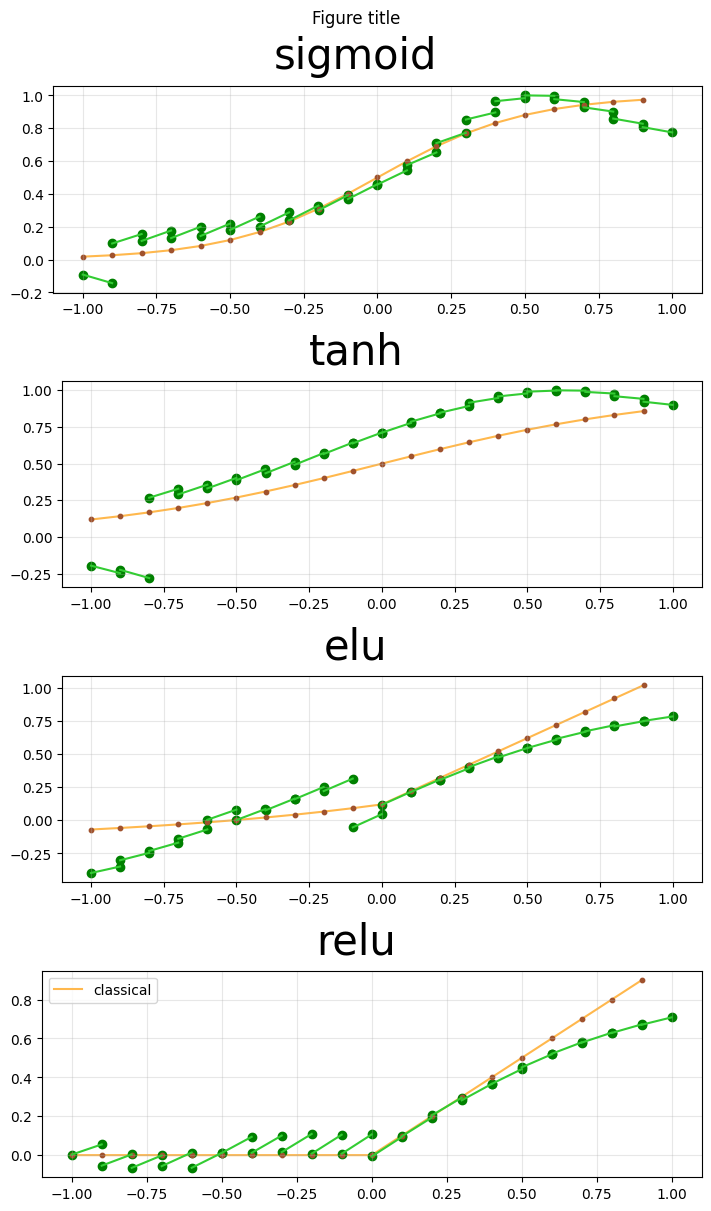

In [17]:

fig = plt.figure(constrained_layout=True, figsize=(7,12))
fig.suptitle('Figure title')
axE = fig.subfigures(4,1,  )
j = 0
rss=[]
for flab, fun in func_out.items():
    axE[j].suptitle(f'{flab}',fontsize=30)

    ax = axE[j].subplots(nrows=1, ncols=1, sharey=True,)

    #ax.set_ylim(-0.1,1)

    j-=-1
    dl = df[df['function'] == flab].iloc[0]
    X = []
    f_i = func_dict[flab]

    x = np.arange(-1, 1 + .03, step).tolist()
    y = [fun(value,f_i) for value in x]

    for i in range(1, len(x)):
        X.append(np.arange(x[i - 1], x[i], step - 0.0001).tolist())


    qc_full = []
    classic_prod = []
    qprod = qProduct(1)
    for i in range(len(X)):
        for x in X[i]:
            point = [1,x]
            qc_full.append(qprod.direct_prod2(dl.weights[i],point,visualize=False))  

    x = [item for sublist in X for item in sublist]
    y = [fun(value,f_i) for value in x]




    x1=[i for j,i in enumerate(x) if j%2==0]
    y1=[i for j,i in enumerate(y) if j%2==0]
    x2 = np.array([i for i in x]).reshape([20,2])
    yeee = np.array([i.item() for i in qc_full]).reshape([20,2])


    #ax.plot(x, qc_full, color='steelblue',label=' Qspline') 
    #ax.scatter(x, qc_full, color='steelblue',label=' Qspline') 
    for xk, yk in zip(x2, yeee):
        ax.plot(xk, yk, color='#33cc33') 
        ax.scatter(xk, yk, color='#008000') 

    ax.plot(x1,y1,color='#ffb84d', zorder = -1, label='classical')
    ax.scatter(x1,y1,color='sienna',s=10)
    ax.grid(alpha=0.3)
plt.legend(loc='best')
plt.show()
plt.close()


In [ ]:
    for i in range(len(X)):
        for x in X[i]:
            point = [1,x]
            qc_full.append(qprod.direct_prod2(dl.weights[0][i],point,visualize=False))  

    x = [item for sublist in X for item in sublist]
    y = [func(value,f_i) for value in x]




    x1=[i for j,i in enumerate(x) if j%2==0]
    y1=[i for j,i in enumerate(y) if j%2==0]
    x2 = np.array([i for i in x]).reshape([20,2])
    yeee = np.array([i.item() for i in qc_full]).reshape([20,2])


    #ax.plot(x, qc_full, color='steelblue',label=' Qspline') 
    #ax.scatter(x, qc_full, color='steelblue',label=' Qspline') 
    for xk, yk in zip(x2, yeee):
        ax.plot(xk, yk, color='#33cc33') 
        ax.scatter(xk, yk, color='#008000') 

    ax.plot(x1,y1,color='#ffb84d', zorder = -1, label='classical')
    ax.scatter(x1,y1,color='sienna',s=10)
    ax.grid(alpha=0.3)
plt.legend(loc='best')
plt.show()
plt.close()


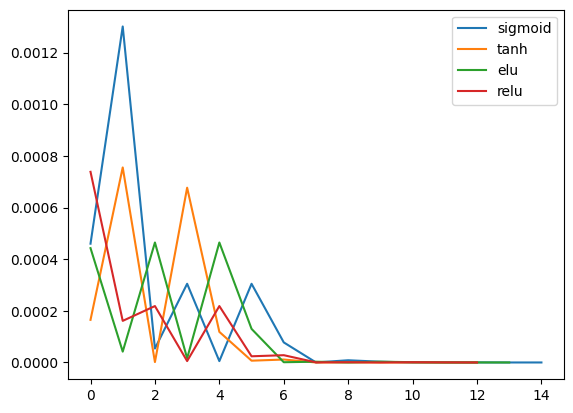

In [107]:
for i,a in df.iterrows():
    plt.plot(np.arange(len(a['training cost'])),a['training cost'], label=a.function)
plt.legend()

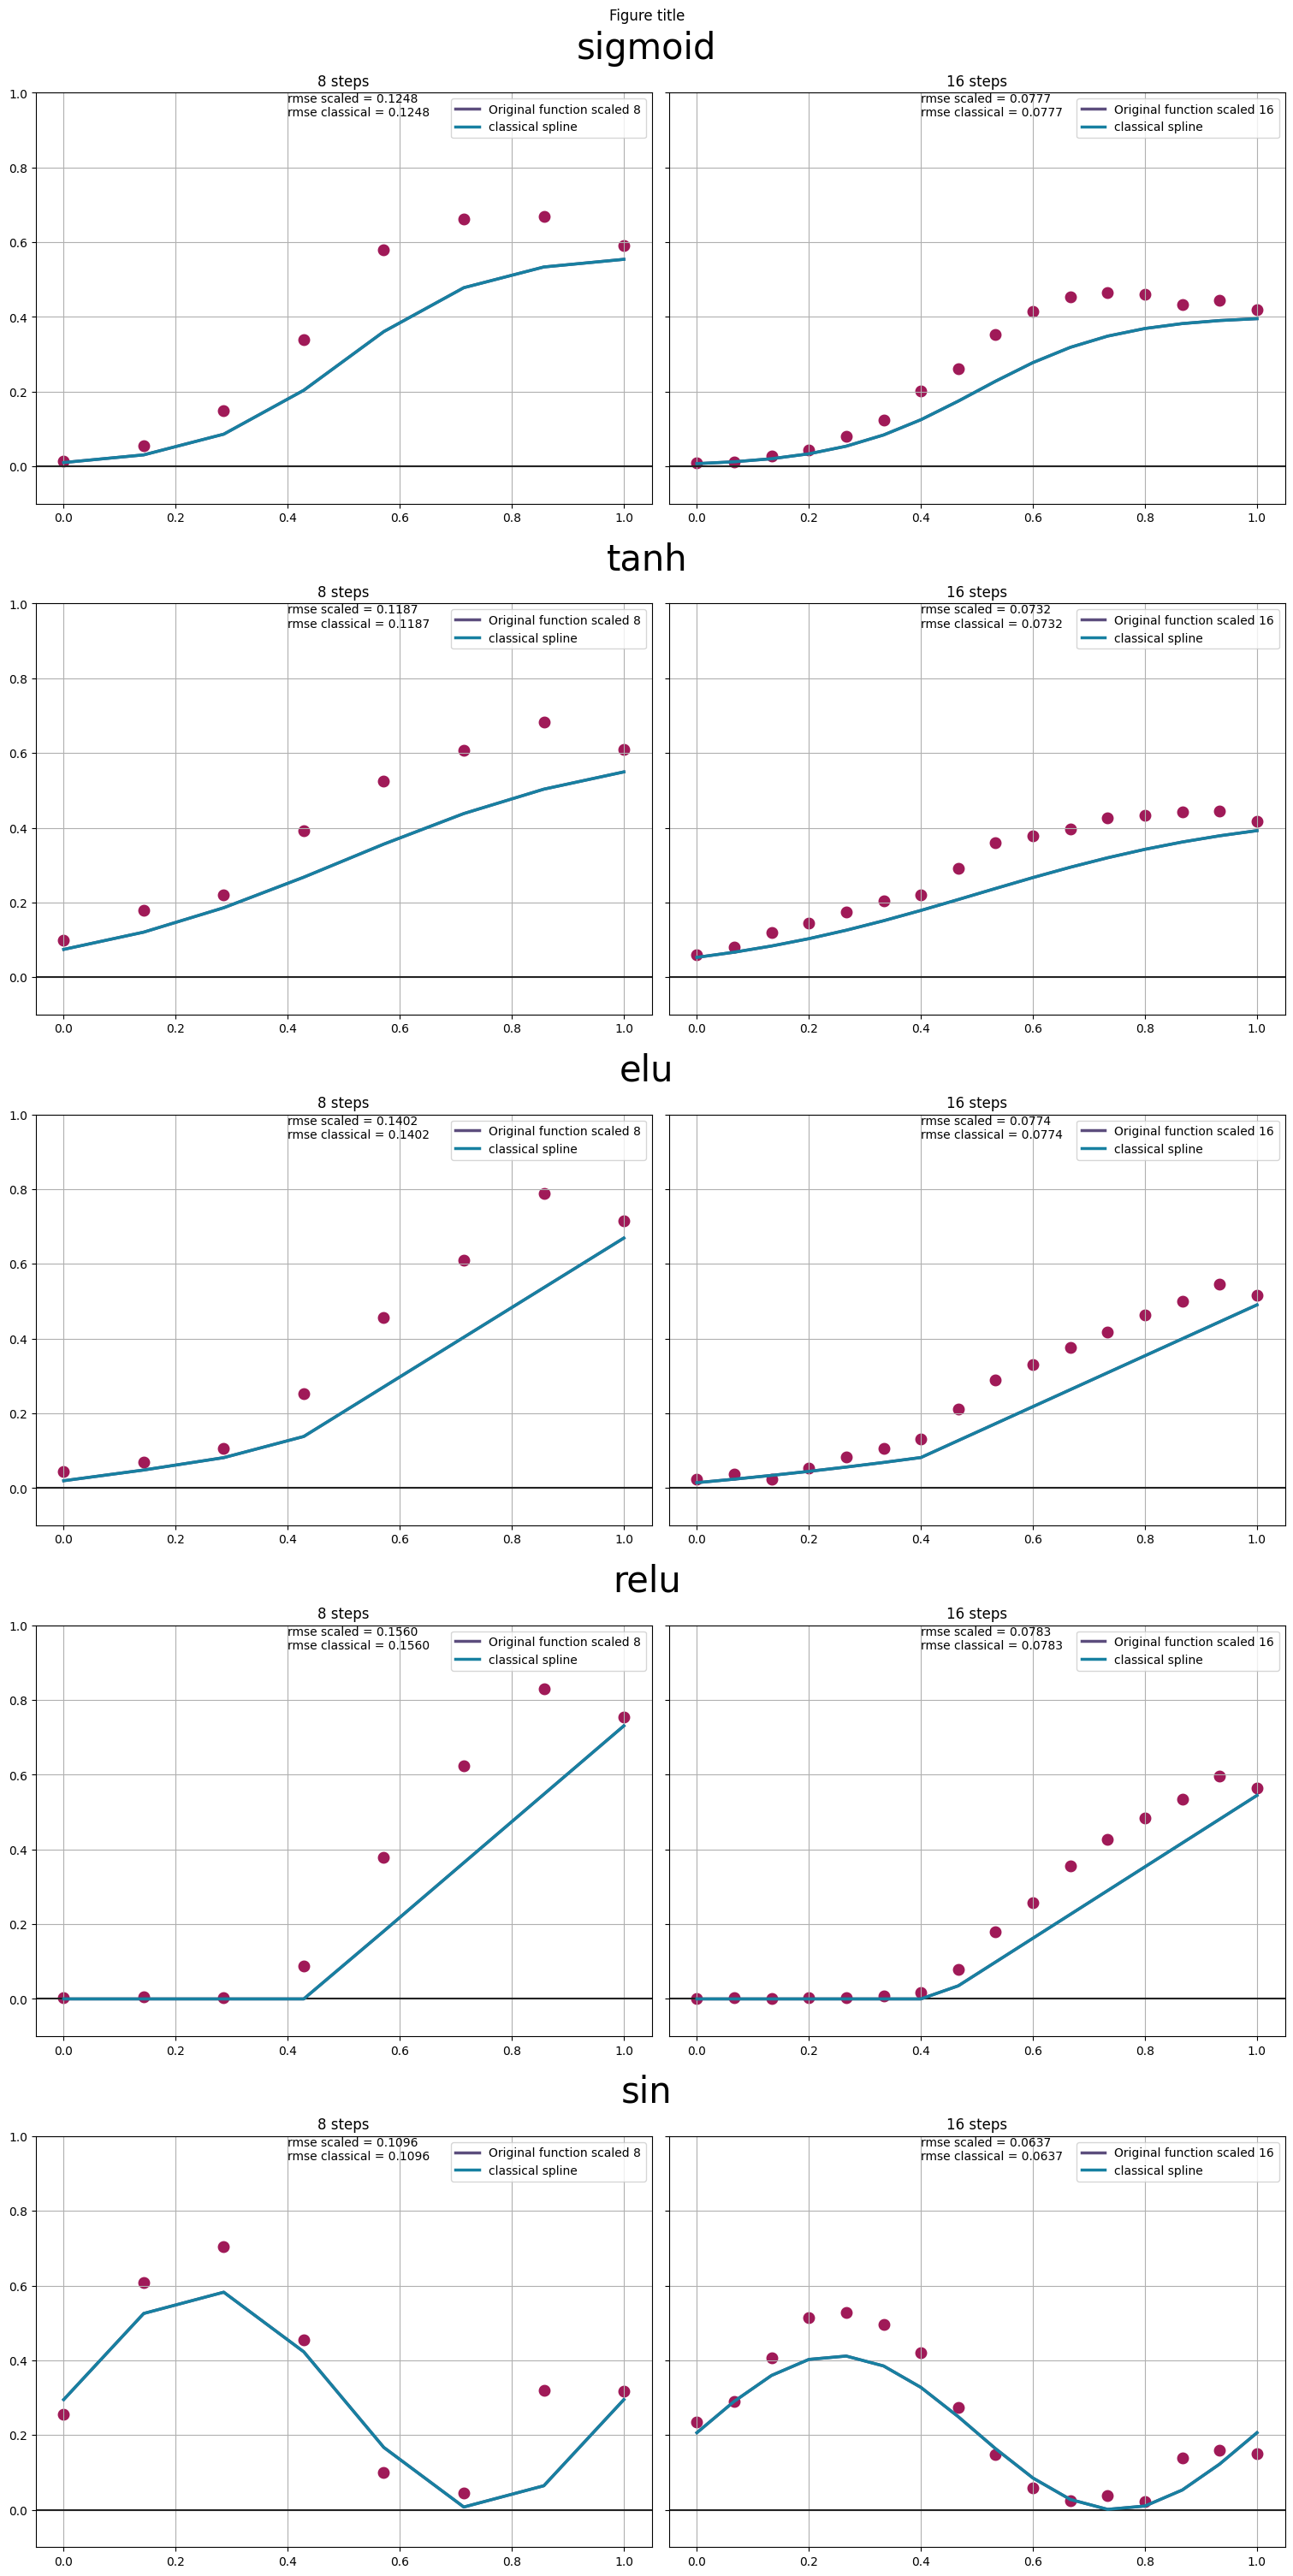

In [ ]:
func_out = {'sigmoid': sigmoid_t,'tanh': tanh_t,'elu': elu_t, 'relu': relu_t, 'sin':sin_m}
func_list = list(func_out.keys())
func_dict = {'sigmoid': .0,'tanh': 1.0,'elu':.12, 'relu':.0, 'sin':.0}

pnq = {'3':(3,8),
        '4':(4,16)}
columns=['function', 'nq', 'knot', 'training cost', 'time(s)', 'weights', 'RSS_h', 'RSS_q' ]
tot = []
for flab, fun in func_out.items():
    for nq, knot in  pnq.values():
        file_path = f"results_{flab}_{nq}.json"
        df = pd.read_json(file_path)
        best = np.argmin(df['RSS_q'])
        #if knot == 16 and flab == "sin":
        #    best = 0
        if knot == 16 and "relu" == flab:
            best = 0
        weights = df['in_train_weights'][best][-1]
        tot.append([flab, nq, knot, df.training_cost[best], df.exe_time[best], weights,df.RSS_h[best], df.RSS_q[best] ])
    
df = pd.DataFrame(tot, columns=columns)
df

fig = plt.figure(constrained_layout=True, figsize=(15,30))
fig.suptitle('Figure title')
axE = fig.subfigures(5,1,  )
j = 0
rss=[]
for flab, fun in func_out.items():
    axE[j].suptitle(f'{flab}',fontsize=30)

    ax = axE[j].subplots(nrows=1, ncols=2, sharey=True,)

    ax[0].set_ylim(-0.1,1)

    j-=-1
    dl = df[df['function'] == flab]
    dl.reset_index(drop=True, inplace=True)
    #x = np.linspace(0, 1, 16).tolist() 
    #for el in x:
    #    plt.axvline(el, color = '#993333', alpha=0.2)
    #x = np.linspace(0, 1, 8).tolist() 
    #for el in x:
    #    plt.axvline(el, color = '#b300b3', alpha=0.2)
    for i, el in dl.iterrows():
        lower = 0.
        upper = 1.

        f_i = func_dict[flab]
        scaled=False    
        label = flab
        n_step = el.knot
        x = np.arange(lower, upper + .03, (upper-lower)/n_step).tolist() 
        xx = np.linspace(lower, upper, n_step) ##inputs sampling in the interval 0,1
        y = [fun(value,f_i) for value in xx]

        #tck=splrep(x,y,k=1) #coeffs
        norm = np.linalg.norm(y)
        y = y / norm
        ax[i].plot(np.linspace(lower,upper,len(y)),y, label=f"Original function scaled {n_step}", color = '#5c4d7d',linewidth=2.5)

        ax[i].axhline(0, color="#222222")
        
        matrix,vector,v_norm = GeneralizedVQS_System(n_step,label,x,xx,scaled=scaled)

        vqls_circuit = VQLS(matrix,v_norm,el['nq'],opt='COBYLA') 

        c = np.linalg.solve(matrix,vector)

        y_c=np.dot(matrix,c) #classic
        ax[i].plot(np.linspace(lower,upper,len(y_c)),vector, label="classical spline", color = '#1780a1',linewidth=2.5)

        y_fq=[]
        q = vqls_circuit.solution(el['weights']).real
        y_q=np.dot(matrix,q) #hybrid
                        #Quantum

        for a in matrix:
            y_fq.append(vqls_circuit.direct_prod2(el['weights'],a))
        rssss = math.sqrt(np.square(np.subtract(y_c,np.abs(y_fq))).mean())
        rssss2 = math.sqrt(np.square(np.subtract(y,np.abs(y_fq))).mean())
        rss.append(rssss)
        colorl = '#b7094c'
        colors = '#a01a58'
        #ax[i].plot(np.linspace(lower,upper,len(y_fq)),np.abs(y_fq),label= f"full quantum {n_step}", color=colorl)
        ax[i].scatter(np.linspace(lower,upper,len(y_fq)),np.abs(y_fq), color=colors, linewidths=4)
        #plt.scatter(np.linspace(lower,upper,len(y_fq)),(y_q), label= f"hq {n_step}", color='blue')
        #plt.plot(np.linspace(lower,upper,len(y_fq)),(y_q), label= f"hq {n_step}", color='blue')
        ax[i].text(0.4,0.9, f"rmse scaled = {rssss2:.4f}\n" \
            f"rmse classical = {rssss:.4f}\n")
        ax[i].set_title(f'{n_step} steps')
        ax[i].legend()
        ax[i].grid()
#plt.savefig(f'full_plots.png')
plt.show()



In [ ]:
func_out = {'sigmoid': sigmoid_t,'tanh': tanh_t,'elu': elu_t, 'relu': relu_t, 'sin':sin_m}
func_list = list(func_out.keys())
func_dict = {'sigmoid': .0,'tanh': 1.0,'elu':.12, 'relu':.0, 'sin':.0}

pnq = {'3':(3,8),
        '4':(4,16)}
columns=['function', 'nq', 'knot', 'training cost', 'time(s)', 'weights', 'RSS_h', 'RSS_q' ]
tot = []
for flab, fun in func_out.items():
    for nq, knot in  pnq.values():
        file_path = f"results_{flab}_{nq}.json"
        df = pd.read_json(file_path)
        best = np.argmin(df['RSS_q'])
        #if knot == 16 and flab == "sin":
        #    best = 0
        if knot == 16 and "relu" == flab:
            best = 0
        weights = df['in_train_weights'][best][-1]
        tot.append([flab, nq, knot, df.training_cost[best], df.exe_time[best], weights,df.RSS_h[best], df.RSS_q[best] ])
    
df = pd.DataFrame(tot, columns=columns)
df

fig = plt.figure(constrained_layout=True, figsize=(15,30))
fig.suptitle('Figure title')
axE = fig.subfigures(5,1,  )
j = 0
rss=[]
for flab, fun in func_out.items():
    axE[j].suptitle(f'{flab}',fontsize=30)

    ax = axE[j].subplots(nrows=1, ncols=2, sharey=True,)

    ax[0].set_ylim(-0.1,1)

    j-=-1
    dl = df[df['function'] == flab]
    dl.reset_index(drop=True, inplace=True)
    #x = np.linspace(0, 1, 16).tolist() 
    #for el in x:
    #    plt.axvline(el, color = '#993333', alpha=0.2)
    #x = np.linspace(0, 1, 8).tolist() 
    #for el in x:
    #    plt.axvline(el, color = '#b300b3', alpha=0.2)
    for i, el in dl.iterrows():
        lower = 0.
        upper = 1.

        f_i = func_dict[flab]
        scaled=False    
        label = flab
        n_step = el.knot
        x = np.arange(lower, upper + .03, (upper-lower)/n_step).tolist() 
        xx = np.linspace(lower, upper, n_step) ##inputs sampling in the interval 0,1
        y = [fun(value,f_i) for value in xx]

        #tck=splrep(x,y,k=1) #coeffs
        norm = np.linalg.norm(y)
        y = y / norm
        ax[i].plot(np.linspace(lower,upper,len(y)),y, label=f"Original function scaled {n_step}", color = '#5c4d7d',linewidth=2.5)

        ax[i].axhline(0, color="#222222")
        
        matrix,vector,v_norm = GeneralizedVQS_System(n_step,label,x,xx,scaled=scaled)

        vqls_circuit = VQLS(matrix,v_norm,el['nq'],opt='COBYLA') 

        c = np.linalg.solve(matrix,vector)

        y_c=np.dot(matrix,c) #classic
        ax[i].plot(np.linspace(lower,upper,len(y_c)),vector, label="classical spline", color = '#1780a1',linewidth=2.5)

        y_fq=[]
        q = vqls_circuit.solution(el['weights']).real
        y_q=np.dot(matrix,q) #hybrid
                        #Quantum

        for a in matrix:
            y_fq.append(vqls_circuit.direct_prod2(el['weights'],a))
        rssss = math.sqrt(np.square(np.subtract(y_c,np.abs(y_fq))).mean())
        rssss2 = math.sqrt(np.square(np.subtract(y,np.abs(y_fq))).mean())
        rss.append(rssss)
        colorl = '#b7094c'
        colors = '#a01a58'
        #ax[i].plot(np.linspace(lower,upper,len(y_fq)),np.abs(y_fq),label= f"full quantum {n_step}", color=colorl)
        ax[i].scatter(np.linspace(lower,upper,len(y_fq)),np.abs(y_fq), color=colors, linewidths=4)
        #plt.scatter(np.linspace(lower,upper,len(y_fq)),(y_q), label= f"hq {n_step}", color='blue')
        #plt.plot(np.linspace(lower,upper,len(y_fq)),(y_q), label= f"hq {n_step}", color='blue')
        ax[i].text(0.4,0.9, f"rmse scaled = {rssss2:.4f}\n" \
            f"rmse classical = {rssss:.4f}\n")
        ax[i].set_title(f'{n_step} steps')
        ax[i].legend()
        ax[i].grid()
#plt.savefig(f'full_plots.png')
plt.show()

